# Классификация трафика: безопасный и вирусный.

Определение является ли трафик опасным/безопасным по большому определённому числу признаков.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline              
import pandas as pd
import seaborn as sns
import sklearn

## Исправление проблем датасета
В исходном датасете в заголовках неравномерно стояли пробелы.

In [2]:
# file = open(url, "r")
# data = file.read()
# file.close()
# file = open(url, "w")
# data = f.replace(' ', '')
# file.write(f)
# file.close()

## Загрузка датасета

In [23]:
url = 'https://raw.githubusercontent.com/Alex-Andr-19/ML-Labs/master/lab-2/Trojan_Detection.csv'
data = pd.read_csv(url, sep=',', header=0, engine='python')
data.shape

(177482, 85)

В датасете присутствуют 85 признаков. Классами являются метки Trojan - вирус и Benign - не вирус. Датасет содержит более 170 000 записей сетевых взаимодействий.

In [24]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 177482 entries, 73217 to 167491
Data columns (total 85 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   FlowID                   177482 non-null  object 
 1   SourceIP                 177482 non-null  object 
 2   SourcePort               177482 non-null  int64  
 3   DestinationIP            177482 non-null  object 
 4   DestinationPort          177482 non-null  int64  
 5   Protocol                 177482 non-null  int64  
 6   Timestamp                177482 non-null  object 
 7   FlowDuration             177482 non-null  int64  
 8   TotalFwdPackets          177482 non-null  int64  
 9   TotalBackwardPackets     177482 non-null  int64  
 10  TotalLengthofFwdPackets  177482 non-null  float64
 11  TotalLengthofBwdPackets  177482 non-null  float64
 12  FwdPacketLengthMax       177482 non-null  float64
 13  FwdPacketLengthMin       177482 non-null  float64
 14  

In [25]:
data.head()

,FlowID,SourceIP,SourcePort,DestinationIP,DestinationPort,Protocol,Timestamp,FlowDuration,TotalFwdPackets,TotalBackwardPackets,...,min_seg_size_forward,ActiveMean,ActiveStd,ActiveMax,ActiveMin,IdleMean,IdleStd,IdleMax,IdleMin,Class
73217,10.42.0.42-121.14.255.84-49975-80-6,10.42.0.42,49975,121.14.255.84,80,6,17/07/201701:18:33,10743584,4,4,...,20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Trojan
72089,172.217.6.226-10.42.0.42-443-49169-17,10.42.0.42,49169,172.217.6.226,443,17,17/07/201710:25:25,254217,6,7,...,20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Trojan
96676,10.42.0.1-10.42.0.42-53-37749-17,10.42.0.42,37749,10.42.0.1,53,17,30/06/201707:16:12,1023244,1,1,...,32,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Benign
42891,10.42.0.1-10.42.0.42-53-41352-17,10.42.0.42,41352,10.42.0.1,53,17,13/07/201703:48:44,286483,1,1,...,20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Trojan
169326,10.42.0.151-107.22.241.77-44353-443-6,10.42.0.151,44353,107.22.241.77,443,6,05/07/201710:47:35,65633087,12,10,...,32,322594.0,0.0,322594.0,322594.0,60306983.0,0.0,60306983.0,60306983.0,Benign


In [26]:
data.tail()

,FlowID,SourceIP,SourcePort,DestinationIP,DestinationPort,Protocol,Timestamp,FlowDuration,TotalFwdPackets,TotalBackwardPackets,...,min_seg_size_forward,ActiveMean,ActiveStd,ActiveMax,ActiveMin,IdleMean,IdleStd,IdleMax,IdleMin,Class
40740,10.42.0.42-64.71.142.96-60811-80-6,10.42.0.42,60811,64.71.142.96,80,6,13/07/201703:50:57,40648037,2,0,...,20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Trojan
82587,10.42.0.42-54.192.36.60-33004-80-6,10.42.0.42,33004,54.192.36.60,80,6,17/07/201703:36:20,2037177,2,0,...,32,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Trojan
66647,172.217.9.232-10.42.0.42-443-51049-6,10.42.0.42,51049,172.217.9.232,443,6,14/07/201703:45:27,397316,9,7,...,32,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Trojan
7987,10.42.0.211-10.42.0.1-9145-53-17,10.42.0.211,9145,10.42.0.1,53,17,11/07/201710:16:27,32073,1,1,...,44,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Trojan
167491,10.42.0.42-104.254.66.16-47389-80-6,10.42.0.42,47389,104.254.66.16,80,6,05/07/201709:18:02,360889,2,0,...,20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Benign


## Визуализация

### Основных характеристики

Берем рандомное подмножество строк датасета

In [27]:
np.random.seed(123)
random_set = np.random.choice(np.arange(data.shape[0]), size=500)

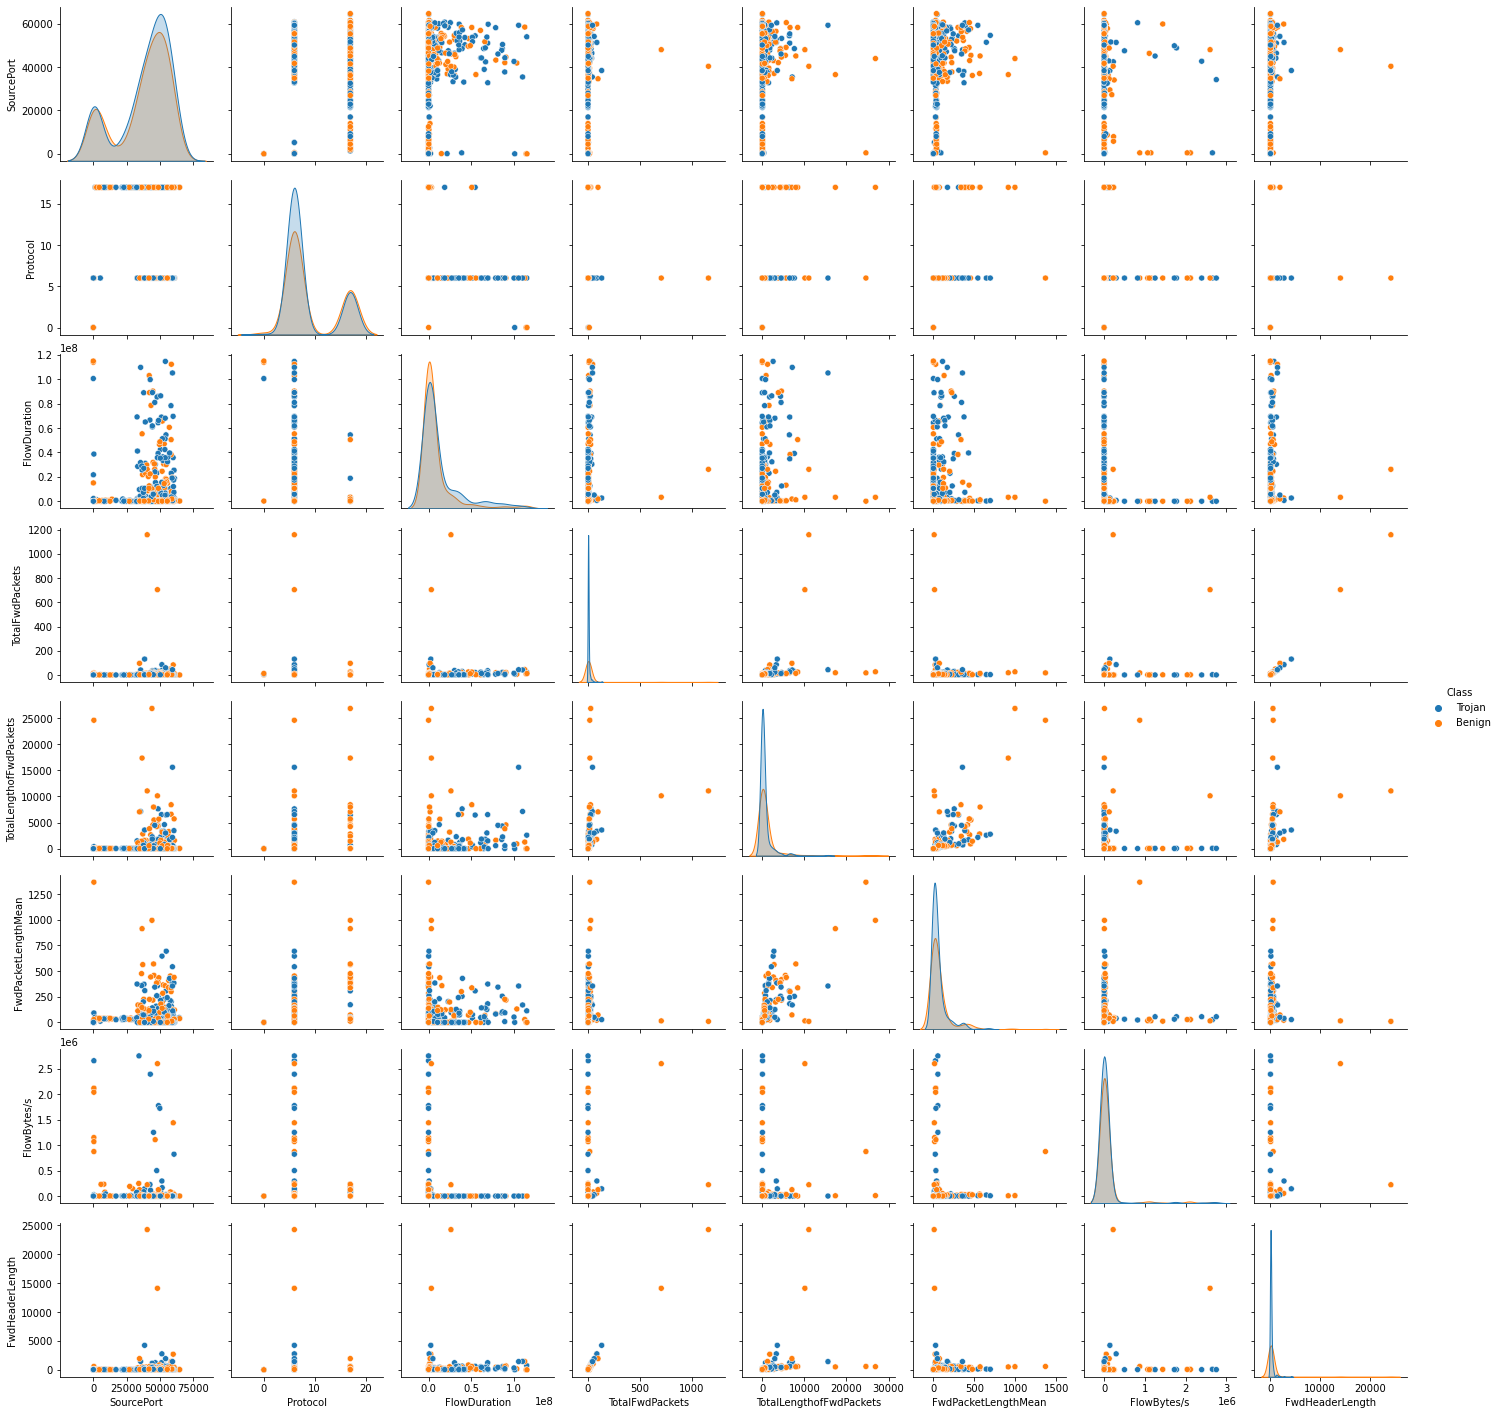

In [28]:
from pandas.plotting import scatter_matrix
headers = ['SourceIP', 'SourcePort', 'Protocol', 'FlowDuration', 'TotalFwdPackets', 'TotalLengthofFwdPackets', 'FwdPacketLengthMean', 'FlowBytes/s', 'FwdHeaderLength', 'Class']
sns.pairplot(data.iloc[random_set][headers], diag_kind = 'auto', hue='Class')
pass

Нетрудно заметить ощутимую зависимость класса от вида протокола, времени его работы и длины пакетов.

### Распределение классов

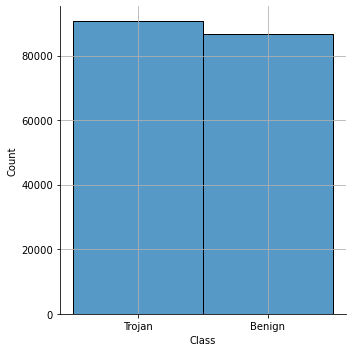

In [29]:
sns.displot(data['Class'], bins=2)
plt.grid()
pass

Будем считать классы сбалансироваными

### Распределение портов

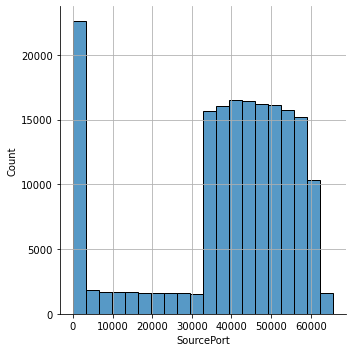

In [30]:
sns.displot(data['SourcePort'], bins=20)
plt.grid()
pass

Можно прдположить, что атаки совершаются в определенное время или пользователи заходят на опасные ресурсы в какое-то определенное время. Исследуем эту зависимость.

### Зависимость IP от времени

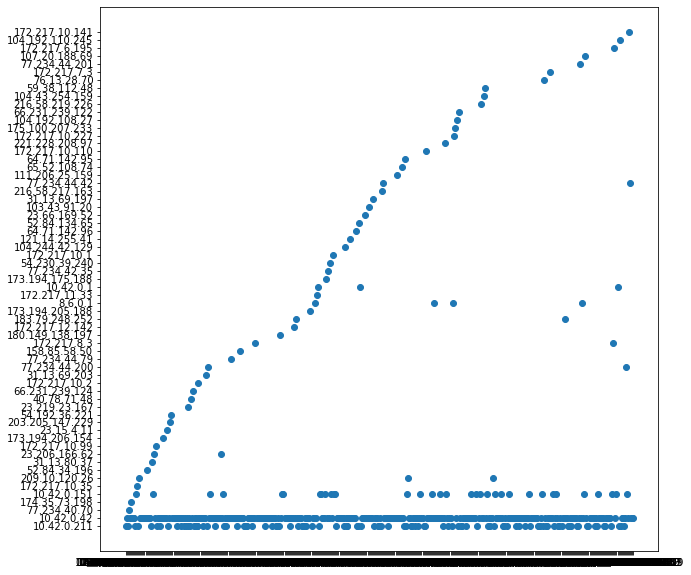

In [31]:
plt.figure(figsize=(10, 10))
plt.scatter(data.iloc[random_set]['Timestamp'], data.iloc[random_set]['SourceIP'])
pass

### Зависимость класса от времени

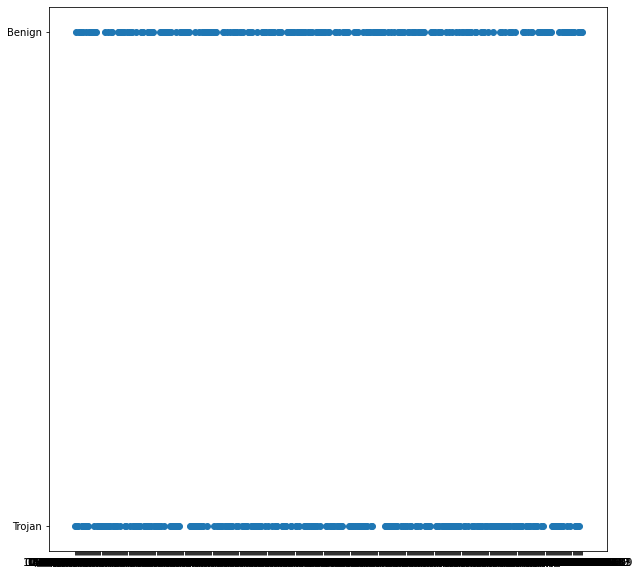

In [32]:
plt.figure(figsize=(10, 10))
plt.scatter(data.iloc[random_set]['Timestamp'], data.iloc[random_set]['Class'])
pass

Так же атаки и вредоносный трафик могут напрямую зависить от портов и IP.

### Зависимость класса от порта

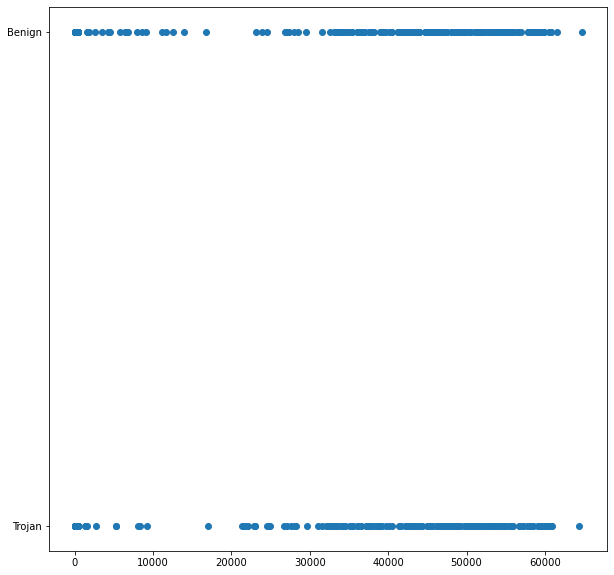

In [33]:
plt.figure(figsize=(10, 10))
plt.scatter(data.iloc[random_set]['SourcePort'], data.iloc[random_set]['Class'])
pass

### Зависимость класса от IP

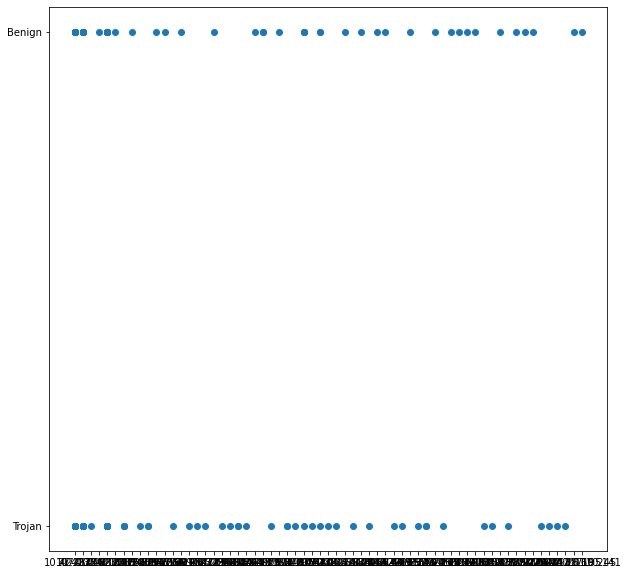

In [34]:
plt.figure(figsize=(10, 10))
plt.scatter(data.iloc[random_set]['SourceIP'], data.iloc[random_set]['Class'])
pass

### Основные характеристики

In [35]:
data.describe()

,SourcePort,DestinationPort,Protocol,FlowDuration,TotalFwdPackets,TotalBackwardPackets,TotalLengthofFwdPackets,TotalLengthofBwdPackets,FwdPacketLengthMax,FwdPacketLengthMin,...,act_data_pkt_fwd,min_seg_size_forward,ActiveMean,ActiveStd,ActiveMax,ActiveMin,IdleMean,IdleStd,IdleMax,IdleMin
count,177482.000000,177482.000000,177482.000000,1.774820e+05,177482.000000,177482.000000,177482.000000,1.774820e+05,177482.000000,177482.000000,...,177482.000000,177482.000000,1.774820e+05,1.774820e+05,1.774820e+05,1.774820e+05,1.774820e+05,1.774820e+05,1.774820e+05,1.774820e+05
mean,38633.298729,5763.328969,8.295917,1.163310e+07,6.743929,9.908261,811.919496,1.023884e+04,230.168969,13.323571,...,1.673894,27.802025,1.421356e+05,2.047529e+04,1.617342e+05,1.264388e+05,4.540725e+06,4.024527e+05,4.894188e+06,4.234695e+06
std,18435.832044,15155.981517,4.540501,2.302798e+07,29.655515,106.401351,6055.745405,1.517666e+05,392.025958,67.749335,...,6.848561,6.652046,7.798898e+05,2.469821e+05,8.791481e+05,7.506803e+05,1.542957e+07,3.246955e+06,1.627581e+07,1.504980e+07
min,0.000000,0.000000,0.000000,2.000000e+00,1.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,...,0.000000,-1.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,34156.000000,80.000000,6.000000,4.690050e+04,1.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,...,0.000000,20.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,43105.500000,443.000000,6.000000,4.854025e+05,2.000000,1.000000,31.000000,3.100000e+01,31.000000,0.000000,...,0.000000,32.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
75%,52135.000000,443.000000,6.000000,1.062035e+07,5.000000,4.000000,451.000000,4.950000e+02,355.000000,21.000000,...,1.000000,32.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
max,65530.000000,65267.000000,17.000000,1.199991e+08,4502.000000,12951.000000,846614.000000,1.868497e+07,1460.000000,1460.000000,...,586.000000,60.000000,3.059421e+07,1.993857e+07,4.902243e+07,3.059421e+07,1.197736e+08,7.445182e+07,1.197736e+08,1.197736e+08


Необходимо нормализовать данные из-за их большого разброса

### Матрица корреляций

In [36]:
corr_mat=data.corr()
corr_mat

,SourcePort,DestinationPort,Protocol,FlowDuration,TotalFwdPackets,TotalBackwardPackets,TotalLengthofFwdPackets,TotalLengthofBwdPackets,FwdPacketLengthMax,FwdPacketLengthMin,...,act_data_pkt_fwd,min_seg_size_forward,ActiveMean,ActiveStd,ActiveMax,ActiveMin,IdleMean,IdleStd,IdleMax,IdleMin
SourcePort,1.000000,-0.710282,-0.096631,0.126908,0.072241,0.032071,0.050839,0.025588,0.211155,-0.074645,...,0.092473,0.003277,0.068427,0.014634,0.063973,0.067352,0.066704,0.019887,0.066310,0.065807
DestinationPort,-0.710282,1.000000,-0.165186,-0.135386,-0.059508,-0.028456,-0.038100,-0.024242,-0.163946,0.037698,...,-0.067539,0.037283,-0.051000,-0.007334,-0.046767,-0.051467,-0.066280,-0.028509,-0.067513,-0.063390
Protocol,-0.096631,-0.165186,1.000000,-0.262353,-0.070046,-0.032686,-0.008224,-0.027739,-0.096863,0.179104,...,0.003692,0.175507,-0.072723,-0.035399,-0.073811,-0.066391,-0.151297,-0.071862,-0.155908,-0.143147
FlowDuration,0.126908,-0.135386,-0.262353,1.000000,0.123910,0.050607,0.089637,0.033185,0.238786,-0.038737,...,0.171774,-0.125844,0.325913,0.267515,0.364715,0.269939,0.733758,0.396360,0.766697,0.685770
TotalFwdPackets,0.072241,-0.059508,-0.070046,0.123910,1.000000,0.903120,0.239152,0.887999,0.215734,-0.026928,...,0.412126,-0.003054,0.156835,0.108562,0.167851,0.135763,0.096512,0.066071,0.103657,0.088171
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ActiveMin,0.067352,-0.051467,-0.066391,0.269939,0.135763,0.075404,0.103488,0.062156,0.181945,0.061742,...,0.176732,0.011355,0.970865,0.034935,0.869774,1.000000,0.335270,0.103926,0.336218,0.326536
IdleMean,0.066704,-0.066280,-0.151297,0.733758,0.096512,0.033756,0.068327,0.018233,0.258082,-0.034394,...,0.149393,-0.012181,0.351814,0.121235,0.342233,0.335270,1.000000,0.231480,0.986114,0.987635
IdleStd,0.019887,-0.028509,-0.071862,0.396360,0.066071,0.020454,0.075579,0.008145,0.144475,0.036467,...,0.126240,0.005829,0.194386,0.393645,0.270594,0.103926,0.231480,1.000000,0.384021,0.078374
IdleMax,0.066310,-0.067513,-0.155908,0.766697,0.103657,0.035625,0.078558,0.018564,0.269149,-0.022404,...,0.166554,-0.010868,0.369307,0.188704,0.375905,0.336218,0.986114,0.384021,1.000000,0.949150


### Корреляции графическом виде

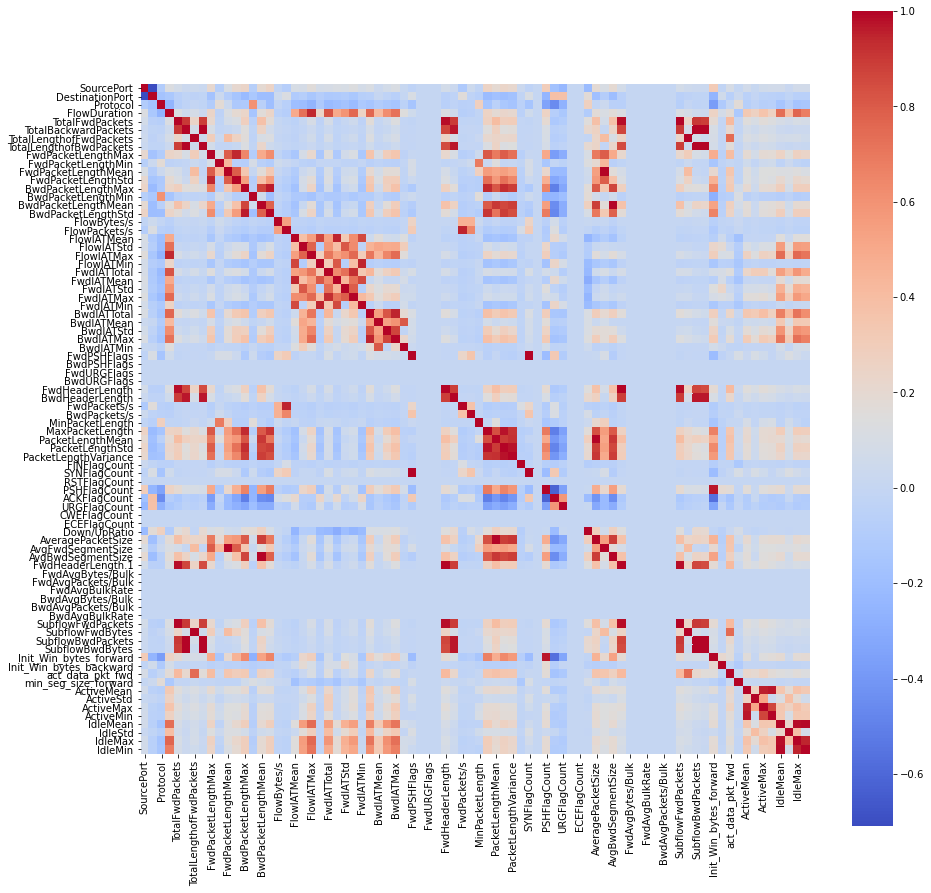

In [37]:
plt.figure(figsize=(15, 15))
sns.heatmap(corr_mat.fillna(0.0), square=True, cmap='coolwarm')
pass

Как можно видеть корреллируют размерные и скоростные характеристики пакетов.

### Можно посмотреть в таком виде

In [38]:
abs(corr_mat) > 0.9

,SourcePort,DestinationPort,Protocol,FlowDuration,TotalFwdPackets,TotalBackwardPackets,TotalLengthofFwdPackets,TotalLengthofBwdPackets,FwdPacketLengthMax,FwdPacketLengthMin,...,act_data_pkt_fwd,min_seg_size_forward,ActiveMean,ActiveStd,ActiveMax,ActiveMin,IdleMean,IdleStd,IdleMax,IdleMin
SourcePort,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
DestinationPort,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
Protocol,False,False,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
FlowDuration,False,False,False,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
TotalFwdPackets,False,False,False,False,True,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ActiveMin,False,False,False,False,False,False,False,False,False,False,...,False,False,True,False,False,True,False,False,False,False
IdleMean,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,True,False,True,True
IdleStd,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
IdleMax,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,True,False,True,True


## Обработка пропущенных значений

In [39]:
data.isna().sum()

FlowID             0
SourceIP           0
SourcePort         0
DestinationIP      0
DestinationPort    0
                  ..
IdleMean           0
IdleStd            0
IdleMax            0
IdleMin            0
Class              0
Length: 85, dtype: int64

In [40]:
data.isna().sum().sum()

0

## Обработка текстовых данных

In [41]:
categorical_columns = [c for c in data.columns if data[c].dtype.name == 'object']
categorical_columns

['FlowID', 'SourceIP', 'DestinationIP', 'Timestamp', 'Class']

Каждое значение преобразуется в число. В данной задаче использование LabelEncoder оптимальнее OneHotEncoder. OneHotEncoder не подходит т.к. в датасете имеется большое количество уникальных данных, что приводит к созданию более чем 19 000 новых булевых признаков.

In [42]:
from sklearn import preprocessing

data_describe = data.describe(include = [object])

number = preprocessing.LabelEncoder()

data["FlowID"] = number.fit_transform(data["FlowID"])
data["SourceIP"] = number.fit_transform(data["SourceIP"])
data["DestinationIP"] = number.fit_transform(data["DestinationIP"])
# !!!
data["Timestamp"] = number.fit_transform(data["Timestamp"])

In [43]:
numerical_columns = [c for c in data.columns if data[c].dtype.name != 'object']
len(numerical_columns)

84

In [44]:
binary_columns = [c for c in categorical_columns if data_describe[c]['unique'] == 2]

In [45]:
data['Class'].unique()

array(['Trojan', 'Benign'], dtype=object)

In [46]:
data.at[data['Class'] == 'Trojan', 'Class'] = 1
data.at[data['Class'] == 'Benign', 'Class'] = 0
data['Class'].describe()

count     177482
unique         2
top            1
freq       90683
Name: Class, dtype: int64

## Нормализация числовых данных

Как было отмечено выше, датасет имеет сильный разброс по мин и макс данным в столбцах, что может негативно сказаться на обучении.  
Необходимо нормализовать данные, т.е. привести их к отрезку [-1;1]

In [47]:
data_numerical = data[numerical_columns].astype('float32')

In [48]:
data_numerical.std(axis = 0)

FlowID             2.614848e+04
SourceIP           3.254763e+02
SourcePort         1.843517e+04
DestinationIP      9.058490e+02
DestinationPort    1.515416e+04
                       ...     
ActiveMin          7.510567e+05
IdleMean           1.542681e+07
IdleStd            3.244641e+06
IdleMax            1.626837e+07
IdleMin            1.504262e+07
Length: 84, dtype: float32

In [49]:
data_numerical = (data_numerical - data_numerical.mean(axis = 0))/data_numerical.std(axis = 0)
data_numerical = data_numerical.fillna(0.0)

## Соединение всех данных

Нужно объединить данные, которые обрабатывались отдельно.

In [50]:
data = pd.concat((data_numerical, data[binary_columns]), axis = 1)
data.shape

(177482, 85)

In [51]:
data.head()

,FlowID,SourceIP,SourcePort,DestinationIP,DestinationPort,Protocol,Timestamp,FlowDuration,TotalFwdPackets,TotalBackwardPackets,...,min_seg_size_forward,ActiveMean,ActiveStd,ActiveMax,ActiveMin,IdleMean,IdleStd,IdleMax,IdleMin,Class
73217,-0.254715,-0.301999,0.615186,-0.551075,-0.375026,-0.505849,1.285127,-0.038535,-0.092545,-0.055504,...,-1.173399,-0.182354,-0.082899,-0.184006,-0.168348,-0.294340,-0.124036,-0.300841,-0.281513,1
72089,0.846458,-0.301999,0.571465,0.048363,-0.351072,1.917732,1.531481,-0.494086,-0.025091,-0.027321,...,-1.173399,-0.182354,-0.082899,-0.184006,-0.168348,-0.294340,-0.124036,-0.300841,-0.281513,1
96676,-1.665657,-0.301999,-0.048003,-0.931933,-0.376807,1.917732,1.765898,-0.460687,-0.193726,-0.083686,...,0.631362,-0.182354,-0.082899,-0.184006,-0.168348,-0.294340,-0.124036,-0.300841,-0.281513,0
42891,-1.619727,-0.301999,0.147439,-0.931933,-0.376807,1.917732,0.755947,-0.492685,-0.193726,-0.083686,...,-1.173399,-0.182354,-0.082899,-0.184006,-0.168348,-0.294340,-0.124036,-0.300841,-0.281513,1
169326,-1.224102,-0.308144,0.310225,-0.696795,-0.351072,-0.505849,-0.346180,2.345306,0.177272,0.000862,...,0.631362,0.231520,-0.082899,0.183011,0.261172,3.614892,-0.124036,3.406167,3.727560,0


## Разбиение данных для обучения и тестов

In [52]:
X = data.drop('Class', axis = 1)
y = data['Class']

In [53]:
X = X.to_numpy()
y = np.array(y, dtype='int')

In [54]:
X.shape

(177482, 84)

In [55]:
y.shape

(177482,)

In [56]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

N_train, _ = X_train.shape 
N_test,  _ = X_test.shape 

print(N_train, N_test)

124237 53245


## Метод K ближайших соседей, подбор n_neighbors

Исследуем оптимальное количество ближайших соседей с шагом 5.

### KNN, 15 соседей

In [57]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors = 15)
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=15)

**Ошибки на тестовой выборке**

In [59]:
y_test_predict = knn.predict(X_test)
err_test  = np.mean(y_test  != y_test_predict)
err_test

MemoryError: Unable to allocate 512. MiB for an array with shape (1080, 124237) and data type float32

In [ ]:
from sklearn.metrics import confusion_matrix

print(confusion_matrix(y_test, y_test_predict))

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_test_predict))

**Ошибки на тренировочной выборке**

In [ ]:
y_train_predict = knn.predict(X_train)
err_train  = np.mean(y_train  != y_train_predict)
err_train

In [ ]:
from sklearn.metrics import confusion_matrix

print(confusion_matrix(y_train, y_train_predict))

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_train, y_train_predict))

### KNN, 20 соседей

In [ ]:
knn = KNeighborsClassifier(n_neighbors = 20)
knn.fit(X_train, y_train)

**Ошибки на тестовой выборке**

In [ ]:
y_test_predict = knn.predict(X_test)
err_test  = np.mean(y_test  != y_test_predict)
err_test

In [ ]:
from sklearn.metrics import confusion_matrix

print(confusion_matrix(y_test, y_test_predict))

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_test_predict))

**Ошибки на тренировочной выборке**

In [ ]:
y_train_predict = knn.predict(X_train)
err_train  = np.mean(y_train  != y_train_predict)
err_train

In [ ]:
from sklearn.metrics import confusion_matrix

print(confusion_matrix(y_train, y_train_predict))

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_train, y_train_predict))

### KNN, 5 соседей

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors = 5)
knn.fit(X_train, y_train)

**Ошибки на тестовой выборке**

In [ ]:
y_test_predict = knn.predict(X_test)
err_test  = np.mean(y_test  != y_test_predict)
err_test

In [ ]:
from sklearn.metrics import confusion_matrix

print(confusion_matrix(y_test, y_test_predict))

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_test_predict))

**Ошибки на тренировочной выборке**

In [ ]:
y_train_predict = knn.predict(X_train)
err_train  = np.mean(y_train  != y_train_predict)
err_train

In [ ]:
from sklearn.metrics import confusion_matrix

print(confusion_matrix(y_train, y_train_predict))

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_train, y_train_predict))

### KNN, 10 соседей

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors = 10)
knn.fit(X_train, y_train)

**Ошибки на тестовой выборке**

In [ ]:
y_test_predict = knn.predict(X_test)
err_test  = np.mean(y_test  != y_test_predict)
err_test

In [ ]:
from sklearn.metrics import confusion_matrix

print(confusion_matrix(y_test, y_test_predict))

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_test_predict))

**Ошибки на тренировочной выборке**

In [ ]:
y_train_predict = knn.predict(X_train)
err_train  = np.mean(y_train  != y_train_predict)
err_train

In [ ]:
from sklearn.metrics import confusion_matrix

print(confusion_matrix(y_train, y_train_predict))

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_train, y_train_predict))

### Результаты KNN

В итоге экспериментов получились следующие результаты  

| Число соседей | Ошибка на тестах | Ошибка на обучении |
| --- | --- | --- |
| 5 | 0.054 | 0.033 |
| 10 | 0.060 | 0.046 |
| 15 | 0.063 | 0.053 |
| 20 | 0.066 | 0.058 |

При небольшом числе соседей алгоритм работает точнее. Это может быть связано с тем, что датасет содержит очень много данных. В таком случае с большой вероятностью могут быть найдены очень близкие соседние элементы, у которых личный класс практически полностью совпадает со средним. Увеличение числа соседей приводит к смещению среднего класса в неверную сторону.

В целом, метод ближайших соседей показал отличную точность.

## RandomForest

Для сравнения рассмотрим алгоритм случайного леса, который заключается в использовании ансамбля деревьев решений.

In [ ]:
from sklearn import ensemble
rf = ensemble.RandomForestClassifier(n_estimators = 1000)
rf.fit(X_train, y_train)

err_train = np.mean(y_train != rf.predict(X_train))
err_test  = np.mean(y_test  != rf.predict(X_test))

print(err_train, err_test)

### Результаты RandomForest
Точность данного алгоритма лучше, чем у метода ближайших соседей, однако, на мой взгляд время обучения в данном случае слишком большое.

## Выводы

В данной работе я рассмотрел задачу о классификации сетевого трафика на вирусный и безопасный. В процессе анилиза данных я попытался виделить признаки, которые вносят основной вклад в классификацию - ip, port, timestamp, длины пакетов. Но в целом, не менее важны и остальные признаки, без которых невозможно достичь высокой точности.  

Благодаря большому числу признаков и записей в датасете, мне удалось получить высокую точность даже на самом простом алгоритме - методе ближайших соседей.  

Для сравнения я использовал метод случайного леса, основанный на ансамбле деревьев решений. Данный метод показал неплохой прирост точности по сравнению с методом ближайших соседей, но из-за этого он требует большого времени обучения. 

